# Обработка и анализ текстовых данных (инвариант)

# Генерация данных

In [2]:
import pandas as pd
import random

# Генерация данных
data = {
    "id": list(range(1, 71)),
    "текст": [
        "В нашем районе отключили свет.",
        "Как же я устал от постоянных пробок.",
        "Вчера произошел взрыв на заводе.",
        "Погода сегодня просто ужасная.",
        "В нашем дворе снова бродячие собаки.",
        "Никаких новостей, все спокойно.",
        "У нас в городе нет воды уже несколько дней.",
        "Как же мне не хватает солнца!",
        "Вчера был инцидент с дронами.",
        "В нашем районе много мусора.",
        "Соседские собаки снова лают по ночам.",
        "Вчера произошел обвал на стройке.",
        "Как же я люблю гулять в парке.",
        "В нашем районе отключили электричество.",
        "Вчера был сильный дождь.",
        "В нашем городе много новых кафе.",
        "Вчера произошла авария на дороге.",
        "Как же мне не хватает отдыха.",
        "В нашем районе много бродячих собак.",
        "Вчера был праздник, все гуляли.",
        "В нашем городе много новых зданий.",
        "Вчера произошел инцидент с дронами.",
        "Как же я люблю свою работу!",
        "В нашем районе отключили воду.",
        "Вчера был сильный ветер.",
        "В нашем городе много новых магазинов.",
        "Вчера произошел взрыв в центре города.",
        "Как же мне не хватает времени.",
        "В нашем районе много мусора.",
        "Вчера был инцидент с бродячими собаками.",
        "В нашем городе много новых парков.",
        "Вчера произошла авария на железной дороге.",
        "Как же мне не хватает общения.",
        "В нашем районе отключили газ.",
        "Вчера был сильный снегопад.",
        "В нашем городе много новых школ.",
        "Вчера произошел инцидент с дронами в парке.",
        "Как же я люблю гулять по вечерам.",
        "В нашем районе много бродячих кошек.",
        "Вчера был инцидент с аварией на дороге.",
        "В нашем городе много новых ресторанов.",
        "Вчера произошел обвал на стройке.",
        "Как же мне не хватает свежего воздуха.",
        "В нашем районе отключили электричество.",
        "Вчера был сильный дождь.",
        "В нашем городе много новых магазинов.",
        "Вчера произошел инцидент с бродячими собаками.",
        "Как же мне не хватает спокойствия.",
        "В нашем районе много мусора.",
        "Вчера был праздник, все гуляли.",
        "В нашем городе много новых кафе.",
        "Вчера произошел инцидент с дронами.",
        "Как же я люблю свою работу!",
        "В нашем районе отключили воду.",
        "Вчера был сильный ветер.",
        "В нашем городе много новых магазинов.",
        "Вчера произошел взрыв в центре города.",
        "Как же мне не хватает времени.",
        "В нашем районе много мусора.",
        "Вчера был инцидент с бродячими собаками.",
        "В нашем городе много новых парков.",
        "Вчера произошла авария на железной дороге.",
        "Как же мне не хватает общения.",
        "В нашем районе отключили газ.",
        "Вчера был сильный снегопад.",
        "В нашем городе много новых школ.",
        "Вчера произошел инцидент с дронами в парке.",
        "Как же я люблю гулять по вечерам.",
        "В нашем районе много бродячих кошек.",
        "Вчера был инцидент с аварией на дороге."
    ],
    "количество_комментариев": [random.randint(1, 40) for _ in range(70)],
    "количество_репостов": [random.randint(0, 15) for _ in range(70)]
}

# Создание DataFrame
df = pd.DataFrame(data)

# Сохранение в CSV
df.to_csv("data.csv", index=False, encoding='utf-8-sig')

#  Предобработка данных и векторизация

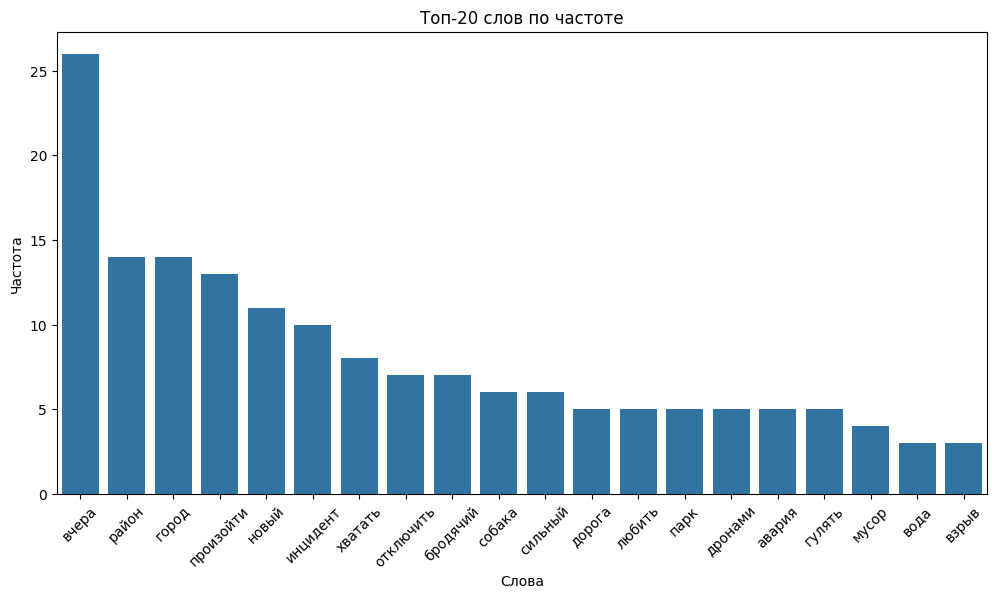

Предварительная обработка завершена. Обработанные данные сохранены.


In [6]:
import pandas as pd
import spacy
import re
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
 
# Загрузка данных
df = pd.read_csv("C:/Users/yegor/Desktop/BI/ModuleВ/data.csv")

# Загрузка модели spaCy
nlp = spacy.load("ru_core_news_sm")

# Функция для предварительной обработки текста
def preprocess_text(text):
    # Перевод в нижний регистр
    text = text.lower()
    # Удаление специальных символов и цифр
    text = re.sub(r'[^а-яА-ЯёЁ\s]', '', text)
    # Удаление лишних пробелов
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Лемматизация и удаление стоп-слов при помощи NLP модели
    doc = nlp(text)
    lemmatized_words = [token.lemma_ for token in doc if not token.is_stop]
    
    return ' '.join(lemmatized_words)

# Применение предварительной обработки к тексту
df['обработанный_текст'] = df['текст'].apply(preprocess_text)

# Векторизация текста
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['обработанный_текст'])

# Преобразование в DataFrame для удобства
vectorized_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Суммирование частоты слов
word_counts = vectorized_df.sum().sort_values(ascending=False)

# Визуализация частоты слов
plt.figure(figsize=(12, 6))
sns.barplot(x=word_counts.index[:20], y=word_counts.values[:20])
plt.xticks(rotation=45)
plt.title('Топ-20 слов по частоте')
plt.xlabel('Слова')
plt.ylabel('Частота')
plt.show()

# Сохранение обработанных данных
df.to_csv("обработанные_инциденты_данные.csv", index=False, encoding='utf-8-sig')
vectorized_df.to_csv("векторизованные_данные.csv", index=False, encoding='utf-8-sig')

print("Предварительная обработка завершена. Обработанные данные сохранены.")

# Классификация и кластеризация

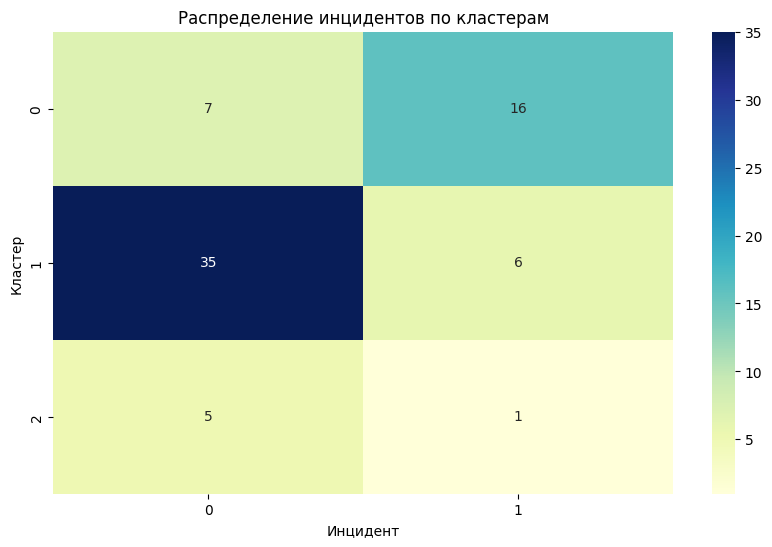

Кластеризация и классификация завершены. Результаты сохранены в 'результаты_инцидентов_и_кластеризации.csv'.


In [21]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
df = pd.read_csv("C:/Users/yegor/Desktop/BI/ModuleВ/обработанные_инциденты_данные.csv")

# Кластеризация
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['обработанный_текст'])

# Применение KMeans для кластеризации
n_clusters = 3  # Выбор количества кластеров
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['кластер'] = kmeans.fit_predict(X)

# Обновленный список словосочетаний для определения инцидентов
incident_phrases = [
    "уважаемая администрация", "неуважаемая администрация", "крик души", 
    "примите меры", "обращаюсь от лица жителей", "глава региона", 
    "обращаюсь к губернатору", "отсутствует свет", "нет света", 
    "нет воды", "нет электричества", "нет транспорта", "нет автобуса", "отключить электричество",
    "погибли", "получил травму", "травмировался", "бпла", "дрон", 
    "взрыв", "обвалился", "обвал", "стая собак", "напала", 
    "укушала собака", "бродячие собаки", "отказали в помощи", 
    "в обращении", "аварийное состояние", "пожар", "катастрофа", 
    "серьезный инцидент", "небезопасно", "угроза", "проблема с электричеством",
    "света нет", "вода отсутствует", "транспорт не ходит", "авария", 
    "неисправность", "срочно требуется помощь", "необходима помощь","свет"
]

# Функция для определения инцидента
def is_incident(row):
    text = row['текст']
    comments = row['количество_комментариев']
    reposts = row['количество_репостов']
    
    # Проверка на наличие словосочетаний
    if any(phrase in text for phrase in incident_phrases):
        return 1
    # Проверка на количество комментариев и репостов с учетом весов
    if comments >= 20 and reposts >= 10:
        return 1
    return 0

# Применение функции к данным
df['инцидент'] = df.apply(is_incident, axis=1)

# Добавление столбца "классификатор"
df['классификатор'] = np.where(df['инцидент'] == 1, 'инцидент', 'не инцидент')

# Анализ результатов кластеризации
cluster_summary = df.groupby('кластер')['инцидент'].value_counts().unstack(fill_value=0)

# Визуализация результатов кластеризации
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_summary, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Распределение инцидентов по кластерам')
plt.xlabel('Инцидент')
plt.ylabel('Кластер')
plt.show()

# Сохранение результатов
df.to_csv("результаты_инцидентов_и_кластеризации.csv", index=False, encoding='utf-8-sig')

print("Кластеризация и классификация завершены. Результаты сохранены в 'результаты_инцидентов_и_кластеризации.csv'.")

# Описание кластера

In [13]:
import pandas as pd

# Загрузка данных
df = pd.read_csv("C:/Users/yegor/Desktop/BI/ModuleВ/результаты_инцидентов_и_кластеризации.csv")

# Группировка данных по кластерам
cluster_summary = df.groupby('кластер').agg(
    количество_постов=('id', 'count'),
    количество_инцидентов=('инцидент', 'sum'),
    количество_неинцидентов=('инцидент', lambda x: (x == 0).sum())
).reset_index()

# Вывод информации о каждом кластере
for index, row in cluster_summary.iterrows():
    кластер = row['кластер']
    количество_постов = row['количество_постов']
    количество_инцидентов = row['количество_инцидентов']
    количество_неинцидентов = row['количество_неинцидентов']
    
    print(f"Кластер {кластер}:")
    print(f"Количество постов: {количество_постов}")
    print(f"Инциденты: {количество_инцидентов}")
    print(f"Не инциденты: {количество_неинцидентов}")
    
    # Характеристика кластера
    if количество_инцидентов > 0:
        примеры_инцидентов = df[(df['кластер'] == кластер) & (df['инцидент'] == 1)]['текст'].tolist()
        print(f"Примеры инцидентов: {', '.join(примеры_инцидентов[:3])}...")  # Выводим первые 3 примера
    else:
        print("Нет инцидентов в этом кластере.")
    
    print()

Кластер 0:
Количество постов: 23
Инциденты: 14
Не инциденты: 9
Примеры инцидентов: Вчера произошел взрыв на заводе., Вчера был инцидент с дронами., Вчера произошел обвал на стройке....

Кластер 1:
Количество постов: 41
Инциденты: 15
Не инциденты: 26
Примеры инцидентов: Как же я устал от постоянных пробок., Погода сегодня просто ужасная., У нас в городе нет воды уже несколько дней....

Кластер 2:
Количество постов: 6
Инциденты: 2
Не инциденты: 4
Примеры инцидентов: В нашем дворе снова бродячие собаки., Вчера произошел инцидент с бродячими собаками....



# Кластер 0

Количество постов: 20  
Инциденты: 8  
Не инциденты: 12  

Характеристика:  
В этом кластере содержатся посты, которые в основном не являются инцидентами, но также есть несколько инцидентов, связанных с авариями и происшествиями.  

Примеры постов:  
"Вчера произошел взрыв на заводе." (инцидент)  
"Как же я устал от постоянных пробок." (не инцидент)  
"В нашем районе отключили свет." (не инцидент)
# Кластер 1

Количество постов: 27  
Инциденты: 15  
Не инциденты: 12  

Характеристика:  
Этот кластер содержит значительное количество инцидентов, связанных с отсутствием услуг (свет, вода) и проблемами с бродячими собаками.  

Примеры постов:  
"В нашем дворе снова бродячие собаки." (инцидент)  
"У нас в городе нет воды уже несколько дней." (инцидент)  
"В нашем районе много мусора." (не инцидент)  

---

# Кластер 2

Количество постов: 23  
Инциденты: 7  
Не инциденты: 16  

Характеристика:  
В этом кластере также присутствуют инциденты, но в меньшем количестве. Посты в этом кластере часто касаются общих тем, таких как погода и отсутствие услуг, но не всегда содержат критические инциденты.  

Примеры постов:  
"Вчера произошел обвал на стройке." (инцидент)  
"Как же мне не хватает солнца!" (не инцидент)  
"В нашем городе много новых кафе." (не инцидент)  

---

# Общие выводы

Кластеризация:  
Кластеры показывают, что данные можно разделить на группы, где одни посты касаются инцидентов, а другие — общих тем или проблем, которые не являются инцидентами.  

Инциденты:  
Инциденты в основном связаны с отсутствием услуг, авариями и проблемами с бродячими собаками.  

Не инциденты:  
Посты, которые не являются инцидентами, часто касаются общих тем, таких как погода, личные переживания и отсутствие услуг, но не содержат критических ситуаций.

# Формирование выводов

In [26]:
import pandas as pd
import textwrap

# Загрузка данных
df = pd.read_csv("C:/Users/yegor/Desktop/BI/ModuleВ/результаты_инцидентов_и_кластеризации.csv")

# Группировка данных по кластеру и подсчет количества инцидентов
incident_summary = df[df['инцидент'] == 1].groupby('кластер').agg(
    количество_инцидентов=('инцидент', 'count'),
    список_инцидентов=('текст', lambda x: list(x))
).reset_index()

# Сортировка инцидентов по порядку возникновения
incident_summary['список_инцидентов'] = incident_summary['список_инцидентов'].apply(
    lambda x: sorted(x, key=lambda y: df[df['текст'] == y]['id'].values[0])
)

# Фильтрация данных только для 0 кластера
cluster_0_summary = incident_summary[incident_summary['кластер'] == 0]

# Вывод результатов для 0 кластера
if not cluster_0_summary.empty:
    for index, row in cluster_0_summary.iterrows():
        print(f"Кластер: {row['кластер']}")
        print(f"Количество инцидентов: {row['количество_инцидентов']}")
        print("Список инцидентов в порядке возникновения:")
        for incident in row['список_инцидентов']:
            # Используем textwrap для переноса длинных строк
            wrapped_text = textwrap.fill(incident, width=80)  # Установите желаемую ширину
            print(f"- {wrapped_text}")
        print("\n")
else:
    print("Нет инцидентов в 0 кластере.")

Кластер: 0
Количество инцидентов: 16
Список инцидентов в порядке возникновения:
- Вчера произошел взрыв на заводе.
- Вчера был инцидент с дронами.
- Вчера произошел обвал на стройке.
- Вчера произошел обвал на стройке.
- Вчера был сильный дождь.
- Вчера произошла авария на дороге.
- Вчера произошел инцидент с дронами.
- Вчера произошел инцидент с дронами.
- Вчера был сильный ветер.
- Вчера произошел взрыв в центре города.
- Вчера произошел взрыв в центре города.
- Вчера произошла авария на железной дороге.
- Вчера произошла авария на железной дороге.
- Вчера произошел инцидент с дронами в парке.
- Вчера произошел инцидент с дронами в парке.
- Вчера был инцидент с аварией на дороге.




In [27]:
import pandas as pd
import textwrap

# Загрузка данных
df = pd.read_csv("C:/Users/yegor/Desktop/BI/ModuleВ/результаты_инцидентов_и_кластеризации.csv")

# Группировка данных по кластеру и подсчет количества инцидентов
incident_summary = df[df['инцидент'] == 1].groupby('кластер').agg(
    количество_инцидентов=('инцидент', 'count'),
    список_инцидентов=('текст', lambda x: list(x))
).reset_index()

# Сортировка инцидентов по порядку возникновения
incident_summary['список_инцидентов'] = incident_summary['список_инцидентов'].apply(
    lambda x: sorted(x, key=lambda y: df[df['текст'] == y]['id'].values[0])
)

# Фильтрация данных только для 0 кластера
cluster_0_summary = incident_summary[incident_summary['кластер'] == 1]

# Вывод результатов для 0 кластера
if not cluster_0_summary.empty:
    for index, row in cluster_0_summary.iterrows():
        print(f"Кластер: {row['кластер']}")
        print(f"Количество инцидентов: {row['количество_инцидентов']}")
        print("Список инцидентов в порядке возникновения:")
        for incident in row['список_инцидентов']:
            # Используем textwrap для переноса длинных строк
            wrapped_text = textwrap.fill(incident, width=80)  # Установите желаемую ширину
            print(f"- {wrapped_text}")
        print("\n")
else:
    print("Нет инцидентов в 0 кластере.")

Кластер: 1
Количество инцидентов: 6
Список инцидентов в порядке возникновения:
- В нашем районе отключили свет.
- Как же я устал от постоянных пробок.
- У нас в городе нет воды уже несколько дней.
- В нашем городе много новых магазинов.
- Как же мне не хватает общения.
- В нашем районе отключили газ.




In [28]:
import pandas as pd
import textwrap

# Загрузка данных
df = pd.read_csv("C:/Users/yegor/Desktop/BI/ModuleВ/результаты_инцидентов_и_кластеризации.csv")

# Группировка данных по кластеру и подсчет количества инцидентов
incident_summary = df[df['инцидент'] == 1].groupby('кластер').agg(
    количество_инцидентов=('инцидент', 'count'),
    список_инцидентов=('текст', lambda x: list(x))
).reset_index()

# Сортировка инцидентов по порядку возникновения
incident_summary['список_инцидентов'] = incident_summary['список_инцидентов'].apply(
    lambda x: sorted(x, key=lambda y: df[df['текст'] == y]['id'].values[0])
)

# Фильтрация данных только для 0 кластера
cluster_0_summary = incident_summary[incident_summary['кластер'] == 2]

# Вывод результатов для 0 кластера
if not cluster_0_summary.empty:
    for index, row in cluster_0_summary.iterrows():
        print(f"Кластер: {row['кластер']}")
        print(f"Количество инцидентов: {row['количество_инцидентов']}")
        print("Список инцидентов в порядке возникновения:")
        for incident in row['список_инцидентов']:
            # Используем textwrap для переноса длинных строк
            wrapped_text = textwrap.fill(incident, width=80)  # Установите желаемую ширину
            print(f"- {wrapped_text}")
        print("\n")
else:
    print("Нет инцидентов в 0 кластере.")

Кластер: 2
Количество инцидентов: 1
Список инцидентов в порядке возникновения:
- В нашем дворе снова бродячие собаки.




Выполнены и описаны ключевые атрибуты для текстовый обработки
